# WEEK 10: DATA CLUSTERING K-means

In [22]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
from math import inf

Consider the following three variables for 20 different basketball players: points, assists, and rebounds.
Perform k-means clustering manually with K=2, using Euclidean distance. Show the working for one iteration
in your Lab Observation Book by using Euclidean distance.

Write a Python function (without using the scikit-learn library) to create a DataFrame containing the three
variables (points, assists, and rebounds) for 20 different basketball players.
Apply the K-means algorithm to identify clusters with K=1, 2, K=3, and K=4, using distance formulas such as
Euclidean distance, Manhattan distance, and Minkowski distance. Perform the following tasks:
1. Create a scatter plot of the data points in blue.
2. Plot the clusters with data points in different colors for K=1, 2, 3, and 4 in separate graphs.
3. Create a plot showing the number of clusters on the x-axis and the Sum of Squared Errors (SSE) on the y-axis.
Compute SSE for all iterations. Show the table of given data points against SSE for every iteration and use the
total sum of SSE in the graph of K vs. SSE .
4. Show the optimal value of K using the Elbow method and mark the same in the graph.

In [50]:
df = pd.read_csv('data1.csv')
df.head()

,Points,Assists,Rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14


In [26]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p):
    return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)


def dist(point1, point2, method="euclid", p=3):
    if method == "euclid":
        return euclidean_distance(point1, point2)
    elif method == "manhattan":
        return manhattan_distance(point1, point2)
    else:
        return minkowski_distance(point1, point2, p)


In [39]:
def ssc(cluster, center, method):
    total_distance = 0 
    for point in cluster:
        total_distance += dists(center, point, method)
    return total_distance

def kmeans(data, k, iters, method):
#     centers = [data[i] for i in range(k)]
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    centers = data[random_indices] 
    
    for _ in range(iters):
        clusters = [[] for _ in range(k)]

        for point in data:
            min_dist = float(inf)
            min_labl = 0
            for j in range(k):
                temp = dists(point, centers[j], method)  
                if min_dist > temp:
                    min_dist = temp
                    min_labl = j
            clusters[min_labl].append(point)

        new_centers = []
        for cluster in clusters:
            if cluster:
                new_centers.append(np.mean(cluster, axis=0))
            else:
                new_centers.append(np.random.rand(data.shape[1]))  

        total_ssc = 0
        for j, center in enumerate(new_centers):
            total_ssc += ssc(clusters[j], center, method)

        centers = new_centers

    return centers, total_ssc

In [81]:
def slope_difference(k_values, ssc_list):
    slopes = []
    for i in range(len(k_values) - 1):
        slope = (ssc_list[i + 1] - ssc_list[i]) / (k_values[i + 1] - k_values[i])
        slopes.append(slope)
    return slopes

def find_elbow(k_values, ssc_list):
    slopes = slope_difference(k_values, ssc_list)
    slope_diffs = slope_difference(range(len(slopes)), slopes)
    elbow_index = np.argmax(np.abs(slope_diffs))
    elbow_k = k_values[elbow_index + 1]
    elbow_ssc = ssc_list[elbow_index + 1]
    return elbow_k, elbow_ss

In [85]:
def runner(method):
    k_vals = [i for i in range(1, 6)]
    ssc_list = []
    iters = 100

    for k in k_vals:
        _, tot_ssc = kmeans(df.values, k, iters, method)  # Convert DataFrame to NumPy array
        ssc_list.append(tot_ssc)

    plt.figure(figsize=(10, 6))
    plt.plot(k_vals, ssc_list)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Total SSC')
    plt.title('K-means Clustering using {method} metric')
    plt.show()
    
    elbow_k, elbow_ssc = find_elbow(k_vals, ssc_list)
    print(f"Elbow point k value: {elbow_k}, SSC value at elbow: {elbow_ssc}")
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df['Points'], df['Assists'], df['Rebounds'], c='blue', marker='o')
    center,_=kmeans(df.values,elbow_k,iters,method)
    for c in center:
        ax.scatter(c[0], c[1], c[2], c='red', marker='x', s=200)


    ax.set_xlabel('Points')
    ax.set_ylabel('Assists')
    ax.set_zlabel('Rebounds')
    ax.set_title('3D Scatter Plot of Points, Assists, and Rebounds')
    plt.show()

## Do 1(a)-1(d) using Euclidean distance.

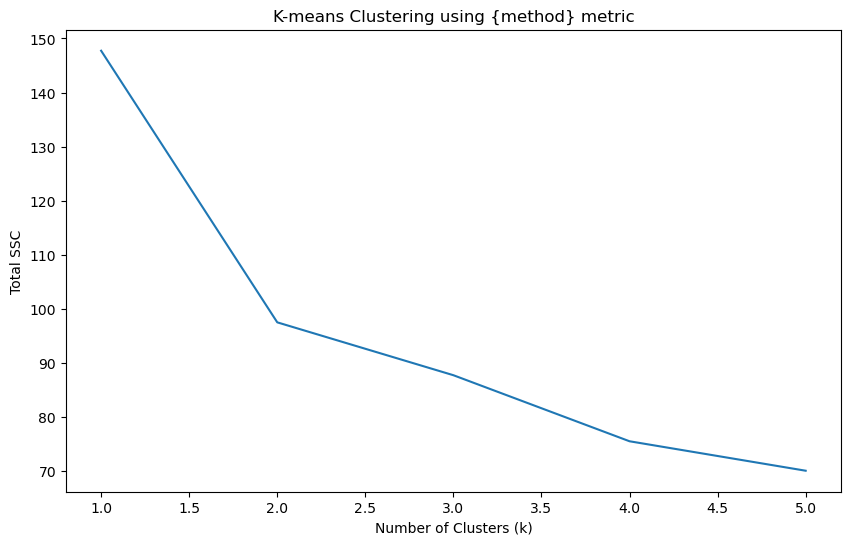

Elbow point k value: 2, SSC value at elbow: 97.50521362467177


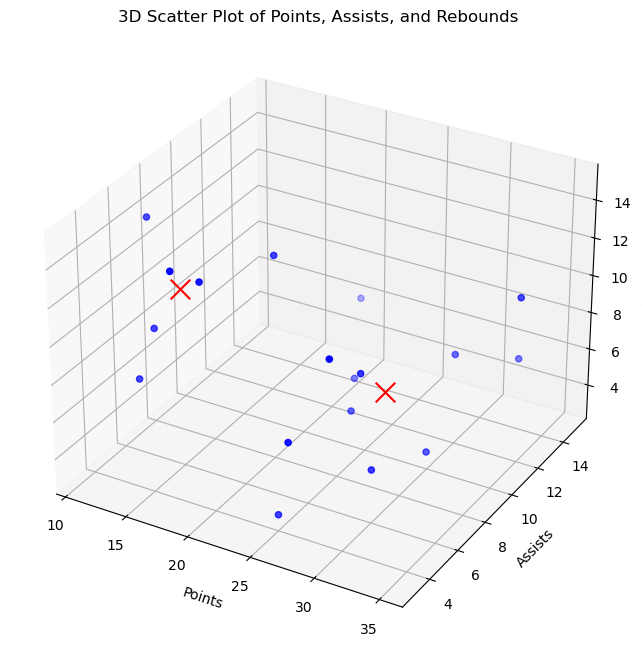

In [78]:
runner("euclid")

## Redo 1(a)-1(d) using Manhattan distance.

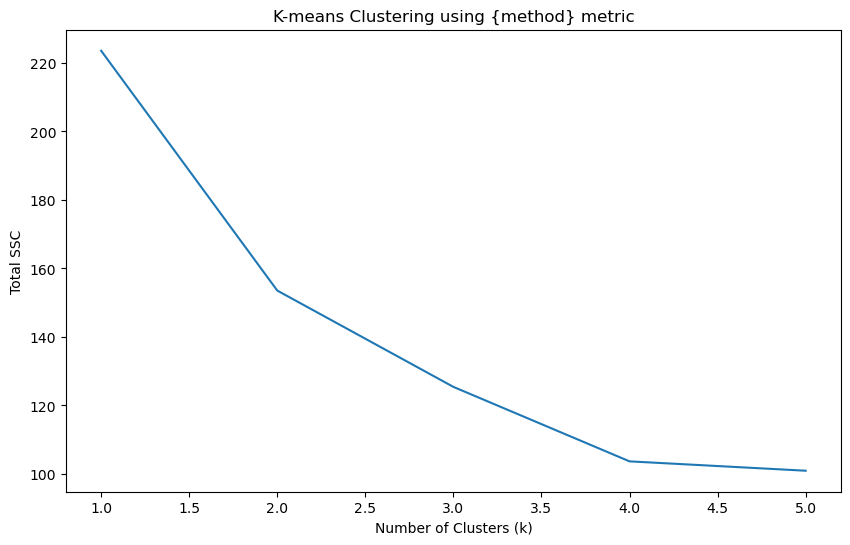

Elbow point k value: 2, SSC value at elbow: 153.53246753246754


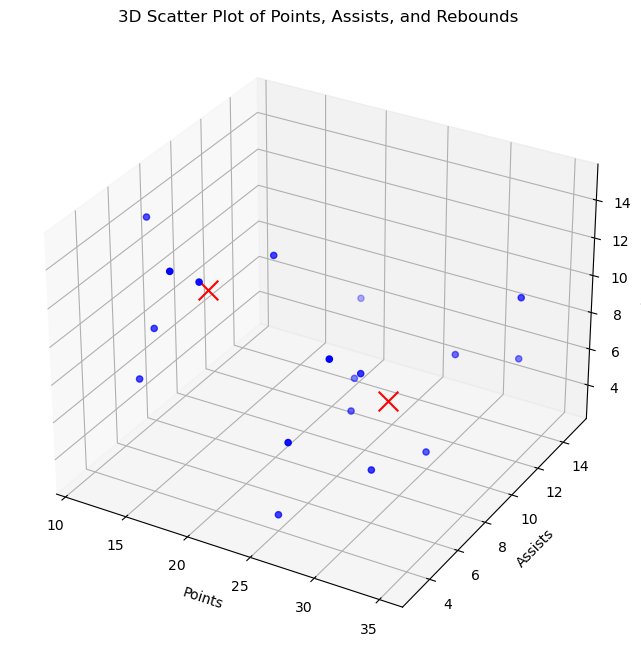

In [79]:
runner("manhattan")

## Redo 1(a)-1(d) using Minkowski distance

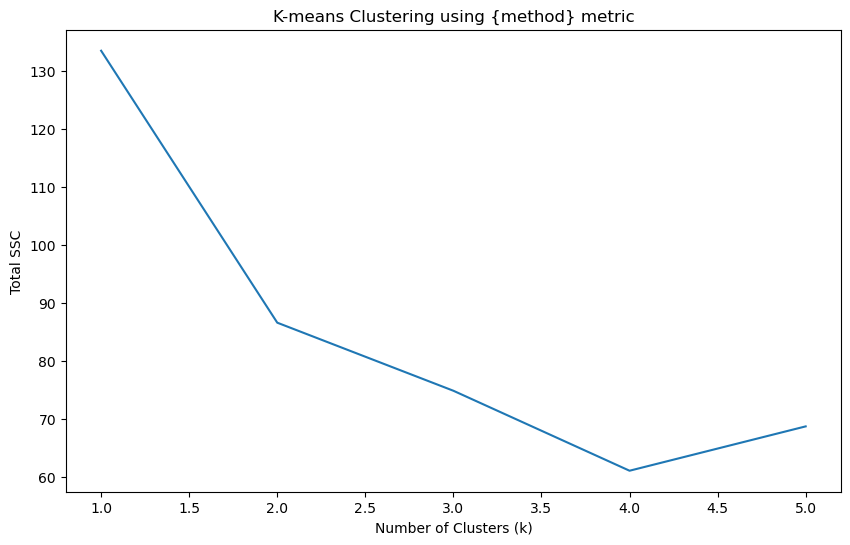

Elbow point k value: 2, SSC value at elbow: 86.66479946949973


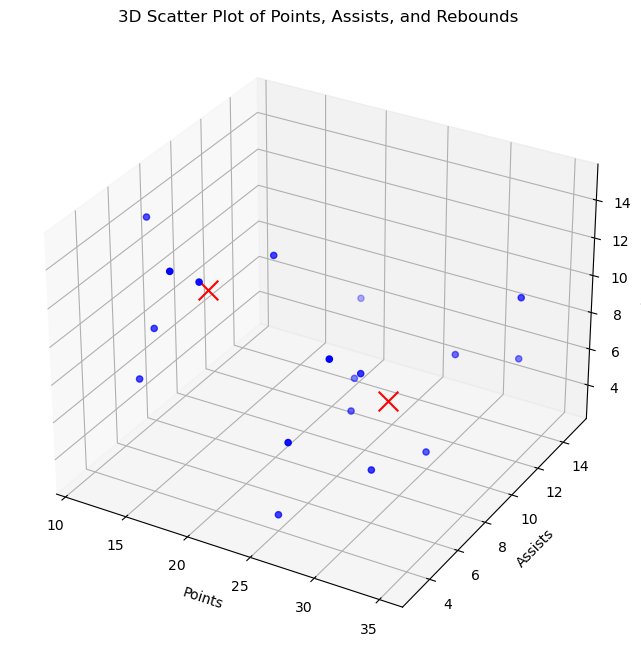

In [80]:
runner("minkowski")